# question 2: Modele de Vasicek

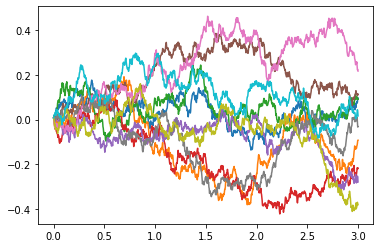

In [4]:

import numpy as np
import numpy.random as sim
import matplotlib.pyplot as plt

T=3
n=1000
N=10 # nombre de trajectoirs
pas =T/n #detla ti

r0=0.008
a=0.5
b=0.012
lmbda=0.18


r=np.ones((n+1,N))*r0


for j in range(N):
    for i in range(1,n+1):
        r[i,j]=r[i-1,j]+a*(b-r[i-1,j])*pas+lmbda*np.sqrt(pas)*sim.randn()
        

dates=np.linspace(0,T,n+1) # n+1 dates
graph=plt.plot(dates,r)
plt.show()


# question 4: approximation du prix ZC B(0,T)

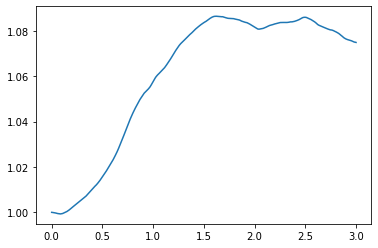

In [12]:
import numpy as np
import numpy.random as sim
import matplotlib.pyplot as plt

T=3
n=1000
N=10 # nombre de trajectoirs
pas =T/n #detla ti

r0=0.008
a=0.5
b=0.012
lmbda=0.18
B=[1] # approximtion du ZC , on suppose que B0=1
interg=np.zeros((n+1,N))
coeff=np.ones((n+1,N))



r=np.ones((n+1,N))*r0


for j in range(N):
    for i in range(1,n+1):
        r[i,j]=r[i-1,j]+a*(b-r[i-1,j])*pas+lmbda*np.sqrt(pas)*sim.randn()
        interg[i,j]=pas*np.sum(r[:i-1,j])
        coeff[i,j]=np.exp(-1*interg[i,j])
        

for i in range(1,n+1):
    b=np.mean(coeff[i,:])
    B.append(b) 
   
        

dates=np.linspace(0,T,n+1) # n+1 dates
graph=plt.plot(dates,B)
plt.show()


# question 7: simuler des trajectoires de S en utilisant STildes:

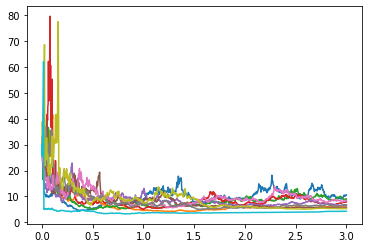

In [29]:
import numpy as np
import numpy.random as sim
import matplotlib.pyplot as plt

T=3
n=1000
N=10 # nombre de trajectoirs
pas =T/n

S0=30
r=0.08 # on suppose que r =0.08


S=np.ones((n+1,N))*S0
STildes=np.ones((n+1,N))*S0


def sigma(t,x):
    y=0.1*(1+t-(x+1/(1+x**2)))
    return y;


for j in range(N):
    for i in range(1,n+1):
        STildes[i,j]=STildes[i-1,j]+sigma(pas*(i-1),STildes[i-1,j])*STildes[i-1,j]\
           *((1/3)*(np.sqrt(pas))*sim.randn()+(2*np.sqrt(2)/3)*(np.sqrt(pas))*sim.randn())
        S[i,j]=STildes[i,j]*np.exp(r*pas*i)
    

dates=np.linspace(0,T,n+1) 
graph=plt.plot(dates,S)
plt.show()

# Question 9: le prix de l'option Europpéenne 

Valeur Approximative du prix de l'option Européenne 5.607747330410218


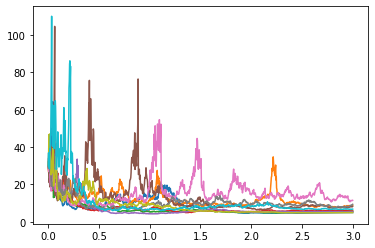

In [33]:
import numpy as np
import numpy.random as sim
import matplotlib.pyplot as plt

T=3
n=1000
N=10 # nombre de trajectoirs
pas =T/n

S0=30
r=0.08


S=np.ones((n+1,N))*S0
STildes=np.ones((n+1,N))*S0


def OptionEuropenne(x):
    return max(2*(x-(x/2)),0)


def sigma(t,x):
    y=0.1*(1+t-(x+1/(1+x**2)))
    return y;



for j in range(N):
    for i in range(1,n+1):
        STildes[i,j]=STildes[i-1,j]+sigma(pas*(i-1),STildes[i-1,j])*STildes[i-1,j]\
           *((1/3)*(np.sqrt(pas))*sim.randn()+(2*np.sqrt(2)/3)*(np.sqrt(pas))*sim.randn())
        S[i,j]=STildes[i,j]*np.exp(r*pas*i)
    #integ=pas*np.sum(S[:j])
    payoffAct.append(np.exp(-r*T)*OptionEuropenne(S[n,j]))

V0approx=np.mean(payoffAct)
print("Valeur Approximative du prix de l'option Européenne",V0approx)




dates=np.linspace(0,T,n+1) 
graph=plt.plot(dates,S)
plt.show()

# Question 9: le prix de l'option Asiatique

Valeur Approximative du prix de l'option Asiatique 0.020282015956067313


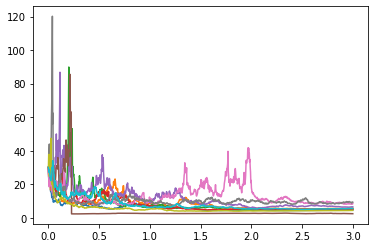

In [45]:
import numpy as np
import numpy.random as sim
import matplotlib.pyplot as plt

T=3
n=1000
N=10 # nombre de trajectoirs
pas =T/n

S0=30
r=0.08
MoyS=[] # pour calculer la maoyenne de S 
PayoffAct=[]
k=5 # on prend k=5


S=np.ones((n+1,N))*S0
STildes=np.ones((n+1,N))*S0



def optionAsiatique(x,k):
    return max(k-x,0)


def sigma(t,x):
    y=0.1*(1+t-(x+1/(1+x**2)))
    return y;



for j in range(N):
    for i in range(1,n+1):
        STildes[i,j]=STildes[i-1,j]+sigma(pas*(i-1),STildes[i-1,j])*STildes[i-1,j]\
           *((1/3)*(np.sqrt(pas))*sim.randn()+(2*np.sqrt(2)/3)*(np.sqrt(pas))*sim.randn())
        S[i,j]=STildes[i,j]*np.exp(r*pas*i)
    MoyS.append(np.mean(S[:i-1,j]))
    tmp=optionAsiatique(MoyS[-1],k) # MoyS[-1] on prend la derniere valeur 
    PayoffAct.append(tmp)

prix =np.mean(PayoffAct)
print("Valeur Approximative du prix de l'option Asiatique",prix)

    
dates=np.linspace(0,T,n+1) 
graph=plt.plot(dates,S)
plt.show()